<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 165.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 183.0 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 150.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [6]:
# Count duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display the first few duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
print("Duplicate rows:")
print(duplicate_rows.head())

# Remove duplicate rows and keep the first occurrence
df_cleaned = df.drop_duplicates()

# Verify removal by counting duplicates again
num_duplicates_after = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicates_after}")


Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, Offic

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [7]:
missing_count = df['CodingActivities'].isna().sum()
print(f"Number of missing values in 'CodingActivities': {missing_count}")

missing_rows = df[df['CodingActivities'].isna()]
print(missing_rows)

Number of missing values in 'CodingActivities': 10971
       ResponseId                                         MainBranch  \
3               4                              I am learning to code   
4               5                     I am a developer by profession   
5               6                        I code primarily as a hobby   
7               8                              I am learning to code   
13             14  I used to be a developer by profession, but no...   
...           ...                                                ...   
65419       65420                     I am a developer by profession   
65420       65421                              I am learning to code   
65426       65427                              I am learning to code   
65429       65430                              I am learning to code   
65436       65437                        I code primarily as a hobby   

                      Age                                         Employment  \
3

##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [10]:
df['CodingActivities'].fillna(method='ffill', inplace=True)
print(f"Number of missing values in 'CodingActivities' after forward-fill: {df['CodingActivities'].isna().sum()}")

Number of missing values in 'CodingActivities' after forward-fill: 0


/tmp/ipykernel_300/650964358.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'].fillna(method='ffill', inplace=True)


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [14]:
comp_columns = ['CompTotal', 'ConvertedCompYearly']

# Ensure the columns exist in the dataset
comp_columns = [col for col in comp_columns if col in df.columns]

print("Final Compensation-related columns:", comp_columns)

# Display summary statistics for these columns
df[comp_columns].describe()

Final Compensation-related columns: ['CompTotal', 'ConvertedCompYearly']


,CompTotal,ConvertedCompYearly
count,3.374000e+04,2.343500e+04
mean,2.963841e+145,8.615529e+04
std,5.444117e+147,1.867570e+05
min,0.000000e+00,1.000000e+00
25%,6.000000e+04,3.271200e+04
50%,1.100000e+05,6.500000e+04
75%,2.500000e+05,1.079715e+05
max,1.000000e+150,1.625660e+07


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [18]:
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['ConvertedCompYearly_Normalized'] = scaler.fit_transform(df[['ConvertedCompYearly']])
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Normalized']].head())

   ConvertedCompYearly  ConvertedCompYearly_Normalized
0                  NaN                             NaN
1                  NaN                             NaN
2                  NaN                             NaN
3                  NaN                             NaN
4                  NaN                             NaN


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [21]:
from sklearn.preprocessing import StandardScaler


# Check if there are any missing values in 'ConvertedCompYearly'
missing_values = df['ConvertedCompYearly'].isna().sum()
print(f"Missing values in 'ConvertedCompYearly': {missing_values}")

# Option 1: Handle missing values (e.g., forward-fill or impute with mean)
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean())

# Check for constant values in the 'ConvertedCompYearly' column
if df['ConvertedCompYearly'].nunique() > 1:
    # Initialize the Z-score scaler
    scaler = StandardScaler()

    # Apply Z-score normalization to the 'ConvertedCompYearly' column
    df['ConvertedCompYearly_Zscore'] = scaler.fit_transform(df[['ConvertedCompYearly']])

    # Display the first few rows to verify
    print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())
else:
    print("Cannot apply Z-score normalization as the column has constant values.")

Missing values in 'ConvertedCompYearly': 0
   ConvertedCompYearly  ConvertedCompYearly_Zscore
0         86155.287263                1.302062e-16
1         86155.287263                1.302062e-16
2         86155.287263                1.302062e-16
3         86155.287263                1.302062e-16
4         86155.287263                1.302062e-16


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


KeyError: 'ConvertedCompYearly_MinMax'

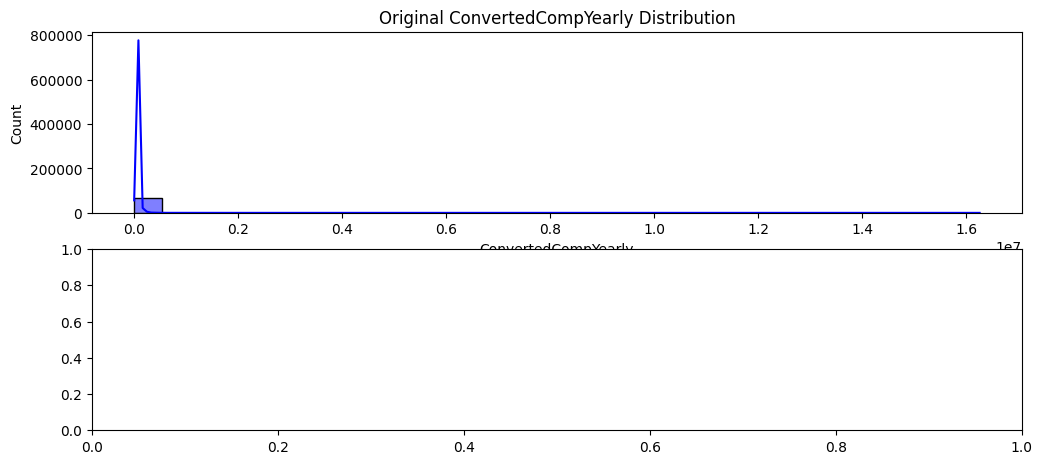

In [23]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for the different versions of ConvertedCompYearly
plt.figure(figsize=(12, 8))

# Original ConvertedCompYearly
plt.subplot(3, 1, 1)
sns.histplot(df['ConvertedCompYearly'], kde=True, color='blue', bins=30)
plt.title('Original ConvertedCompYearly Distribution')

# Min-Max Normalized ConvertedCompYearly
plt.subplot(3, 1, 2)
sns.histplot(df['ConvertedCompYearly_MinMax'], kde=True, color='green', bins=30)
plt.title('Min-Max Normalized ConvertedCompYearly')

# Z-score Normalized ConvertedCompYearly
plt.subplot(3, 1, 3)
sns.histplot(df['ConvertedCompYearly_Zscore'], kde=True, color='red', bins=30)
plt.title('Z-score Normalized ConvertedCompYearly')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
